# K-Means Clustering

We try to cluster the Wine dataset using K-Means Alogorithm which is an Unsupervised model (assuming no label classification exists)

In [2]:
df1 <-read.csv('winequality-red.csv',sep=';')
df2 <-read.csv('winequality-white.csv',sep =';')

In [3]:
head(df2)

fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
7.0,0.27,0.36,20.7,0.045,45,170,1.0010,3.00,0.45,8.8,6
6.3,0.30,0.34,1.6,0.049,14,132,0.9940,3.30,0.49,9.5,6
8.1,0.28,0.40,6.9,0.050,30,97,0.9951,3.26,0.44,10.1,6
7.2,0.23,0.32,8.5,0.058,47,186,0.9956,3.19,0.40,9.9,6
7.2,0.23,0.32,8.5,0.058,47,186,0.9956,3.19,0.40,9.9,6
8.1,0.28,0.40,6.9,0.050,30,97,0.9951,3.26,0.44,10.1,6


In [7]:
df1$label <- sapply(df1$pH,function(x){'red'})
df2$label <- sapply(df2$pH,function(x){'white'})

In [6]:
head(df1)

fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality,label
7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5,red
7.8,0.88,0.00,2.6,0.098,25,67,0.9968,3.20,0.68,9.8,5,red
7.8,0.76,0.04,2.3,0.092,15,54,0.9970,3.26,0.65,9.8,5,red
11.2,0.28,0.56,1.9,0.075,17,60,0.9980,3.16,0.58,9.8,6,red
7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5,red
7.4,0.66,0.00,1.8,0.075,13,40,0.9978,3.51,0.56,9.4,5,red


In [8]:
wine <-rbind(df1,df2)

In [10]:
tail(wine)

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality,label
6492,6.5,0.23,0.38,1.3,0.032,29,112,0.99298,3.29,0.54,9.7,5,white
6493,6.2,0.21,0.29,1.6,0.039,24,92,0.99114,3.27,0.50,11.2,6,white
6494,6.6,0.32,0.36,8.0,0.047,57,168,0.99490,3.15,0.46,9.6,5,white
6495,6.5,0.24,0.19,1.2,0.041,30,111,0.99254,2.99,0.46,9.4,6,white
6496,5.5,0.29,0.30,1.1,0.022,20,110,0.98869,3.34,0.38,12.8,7,white
6497,6.0,0.21,0.38,0.8,0.020,22,98,0.98941,3.26,0.32,11.8,6,white


In [12]:
library(ggplot2)

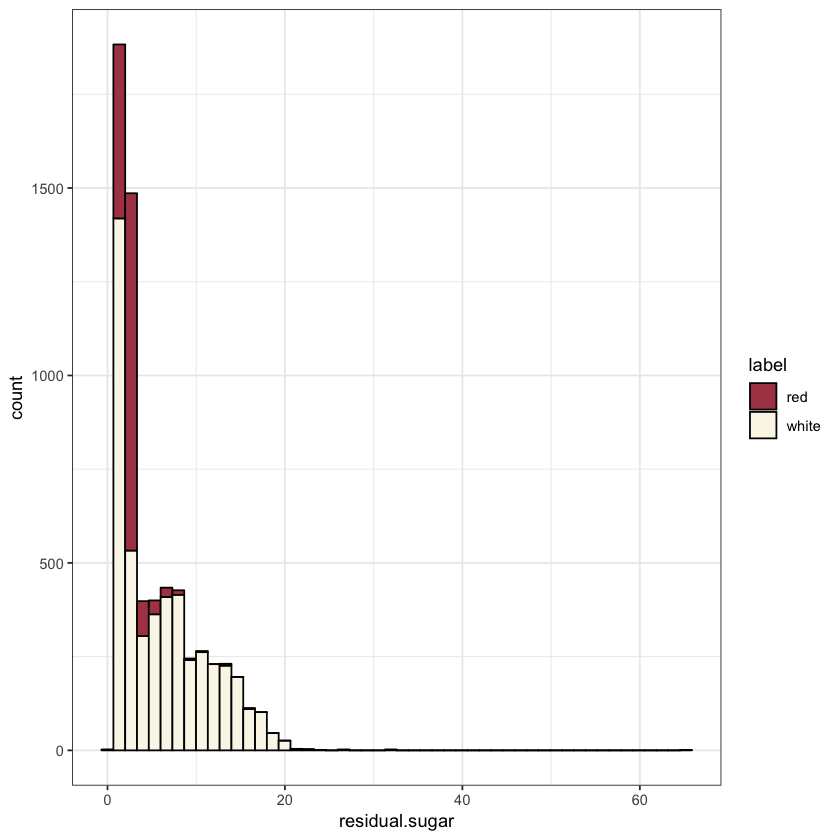

In [15]:
pl <- ggplot(wine,aes(residual.sugar))+ geom_histogram(aes(fill=label),color='black',
                                                       bins=50)
pl + scale_fill_manual(values=c('#ae4554','#faf7ea')) + theme_bw()

**The red wine has higher sugar residulas than the White wine.** 

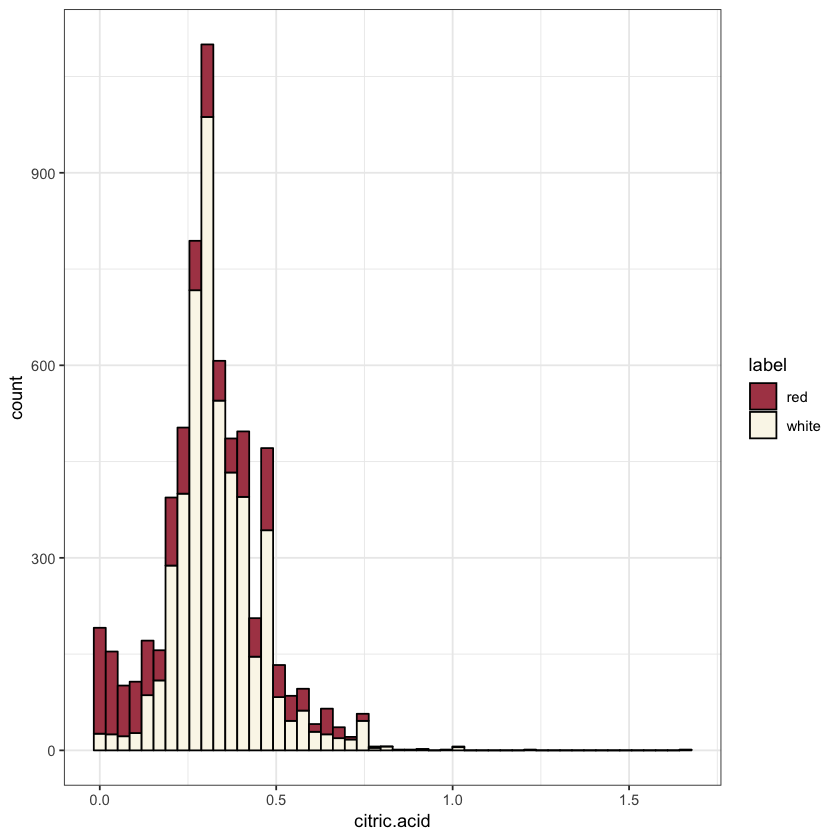

In [16]:
pl <- ggplot(wine,aes(citric.acid))+ geom_histogram(aes(fill=label),color='black',
                                                       bins=50)
pl + scale_fill_manual(values=c('#ae4554','#faf7ea')) + theme_bw()

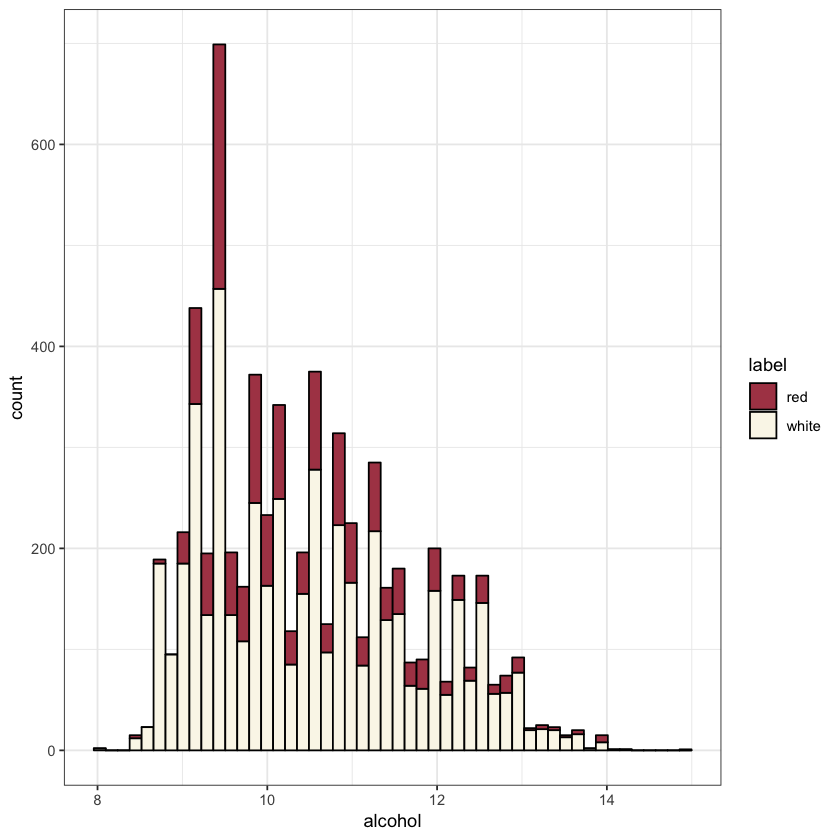

In [17]:
pl <- ggplot(wine,aes(alcohol))+ geom_histogram(aes(fill=label),color='black',
                                                       bins=50)
pl + scale_fill_manual(values=c('#ae4554','#faf7ea')) + theme_bw()

**There is frequent ups and down in the histogram due to the alohol Content is usually represented as a whole number or on a 0.5 metric increase.**

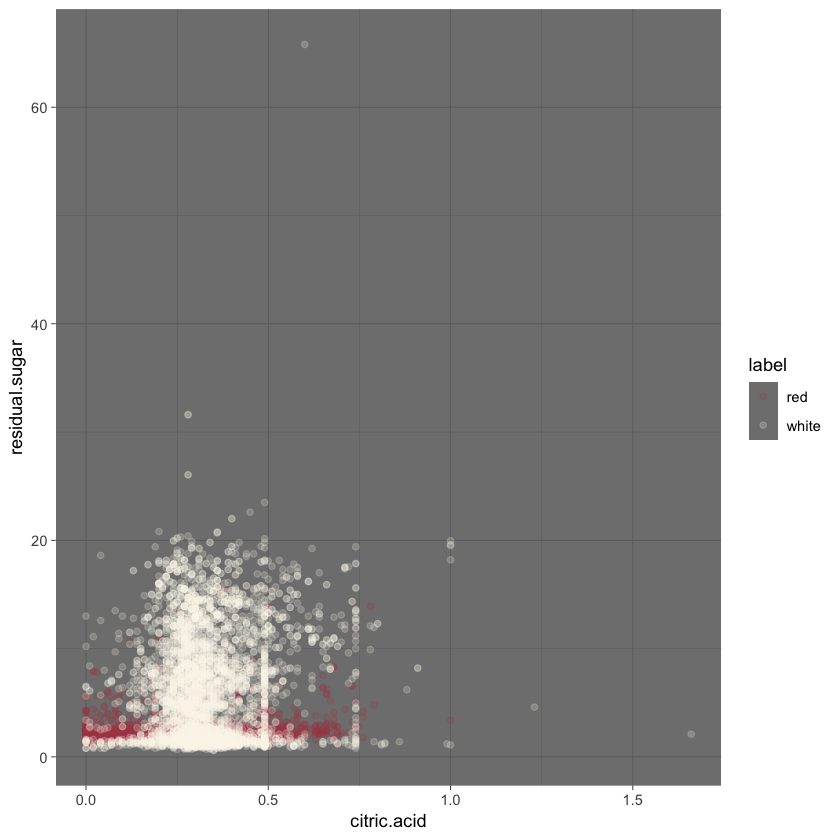

In [19]:
pl <-ggplot(wine,aes(citric.acid,residual.sugar))+ geom_point(aes(color=label),alpha = 0.2)
pl + scale_color_manual(values = c('#ae4554','#faf7ea'))+ theme_dark()

**There is one outlier above the value of 60 on the residual sugar.**

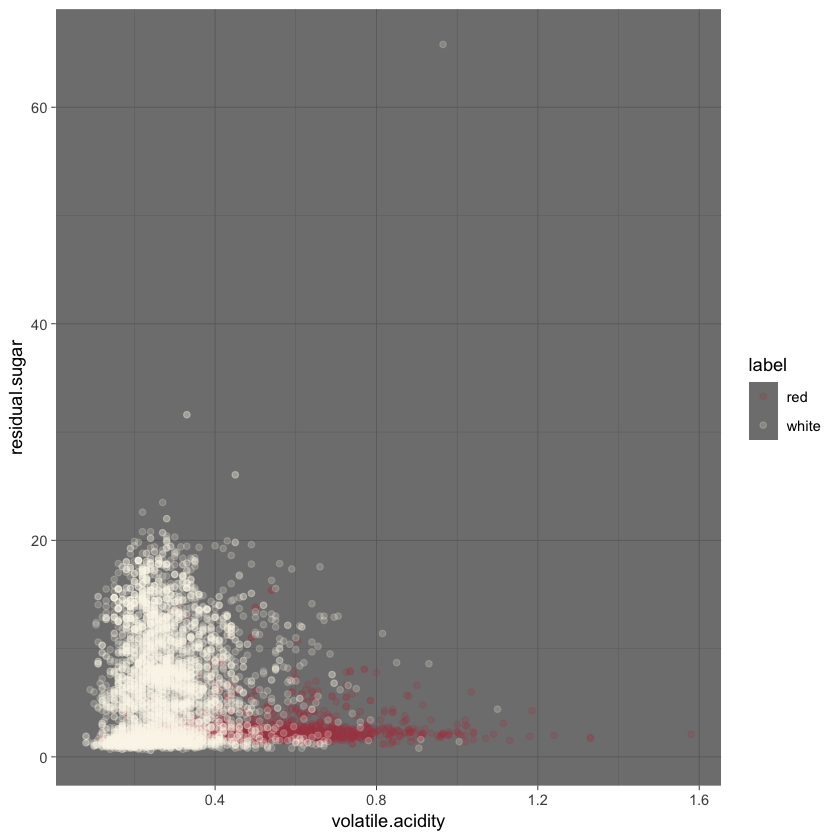

In [20]:
pl <-ggplot(wine,aes(volatile.acidity,residual.sugar))+ geom_point(aes(color=label),alpha = 0.2)
pl + scale_color_manual(values = c('#ae4554','#faf7ea'))+ theme_dark()

**No White wine has the acidity above 0.4 level.** 

# Model Building

In [21]:
clus.data <- wine[,1:12]
head(clus.data)

fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5
7.8,0.88,0.00,2.6,0.098,25,67,0.9968,3.20,0.68,9.8,5
7.8,0.76,0.04,2.3,0.092,15,54,0.9970,3.26,0.65,9.8,5
11.2,0.28,0.56,1.9,0.075,17,60,0.9980,3.16,0.58,9.8,6
7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5
7.4,0.66,0.00,1.8,0.075,13,40,0.9978,3.51,0.56,9.4,5


In [22]:
wine.cluster <-kmeans(clus.data,2)
print(wine.cluster$centers)

  fixed.acidity volatile.acidity citric.acid residual.sugar  chlorides
1      7.623219        0.4086378   0.2908725       3.076425 0.06580983
2      6.904812        0.2871659   0.3397642       7.244809 0.04859257
  free.sulfur.dioxide total.sulfur.dioxide   density       pH sulphates
1            18.39868             63.26318 0.9945736 3.254882 0.5724145
2            39.75590            155.69246 0.9947903 3.190808 0.4999485
   alcohol  quality
1 10.79722 5.810541
2 10.25932 5.824343


**Its hard to decide on the model.In unsupervised model (K-Means Model) there is no way to determine the labels of the data beforehand.** 

In [23]:
table(wine$label, wine.cluster$cluster)

       
           1    2
  red   1514   85
  white 1294 3604

**Red wine data seems to be easier to cluster.**
 - **The K Means alogorithm can only cluster, it cannot suggest on the labels.**